# Time series analysis and forecasting of Solar energy

### About dataset

This solar energy dataset consitsts of solar data and this can be used for forecasting the amount of energy consumed in future. The dataset consists of data of the year 2020 and it consists of 5137 rows and comprises of 8 columns.

### Importing libraries and reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
missing = ['--', 'NA', 'na', '-',' ']
solar_data = pd.read_csv("https://raw.githubusercontent.com/harinyadevi/Solar_energy_forecasting/main/solarenergy.csv", na_values = missing , parse_dates=True)
solar_data1 = pd.read_csv("https://raw.githubusercontent.com/harinyadevi/Solar_energy_forecasting/main/solarenergy.csv", na_values = missing , parse_dates=True)
solar_data.head()

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,03-08-2020 00:00,11385,27,7.5,75.0,8.0,29.82,69.0
1,02-08-2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
2,02-08-2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
3,02-08-2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
4,02-08-2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0


In [3]:
solar_data.tail()

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
5131,01-01-2020 04:00,17159,NaN,NaN,NaN,NaN,NaN,NaN
5132,01-01-2020 03:00,16939,NaN,NaN,NaN,NaN,NaN,NaN
5133,01-01-2020 02:00,16806,NaN,NaN,NaN,NaN,NaN,NaN
5134,01-01-2020 01:00,16748,NaN,NaN,NaN,NaN,NaN,NaN
5135,01-01-2020 00:00,16789,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
solar_data.shape

(5136, 8)

In [5]:
solar_data.Datetime.dtype

dtype('O')

In [6]:
solar_data.dtypes

Datetime                        object
solar_mw                         int64
wind-direction                  object
wind-speed                     float64
humidity                       float64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
temperature                    float64
dtype: object

In [7]:
solar_data.describe()

,solar_mw,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
count,5136.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,11710.292251,10.096986,73.513699,10.129154,30.017760,58.468493
std,2579.307816,4.838185,15.077139,7.261547,0.142006,6.841200
min,6739.000000,1.100000,14.000000,0.000000,29.480000,42.000000
25%,9801.000000,6.600000,65.000000,5.000000,29.920000,53.000000
50%,11208.500000,10.000000,77.000000,9.000000,30.000000,59.000000
75%,13257.000000,13.100000,84.000000,15.000000,30.110000,63.000000
max,21232.000000,26.600000,100.000000,40.000000,30.530000,78.000000


### Preprocessing

Boxplots for each attribute in the dataset is plotted to check for outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


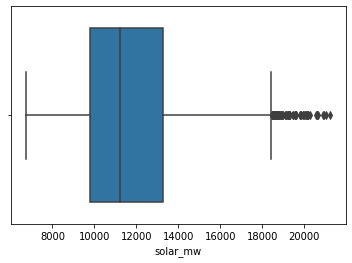

In [8]:
sns.boxplot(solar_data['solar_mw'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


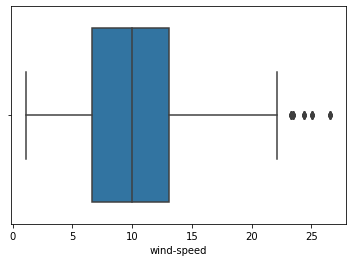

In [9]:
sns.boxplot(solar_data['wind-speed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


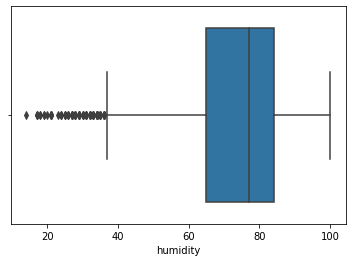

In [10]:
sns.boxplot(solar_data['humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


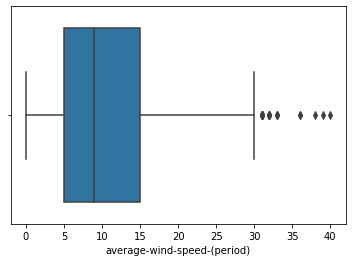

In [11]:
sns.boxplot(solar_data['average-wind-speed-(period)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


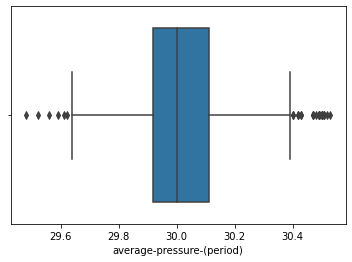

In [12]:
sns.boxplot(solar_data['average-pressure-(period)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


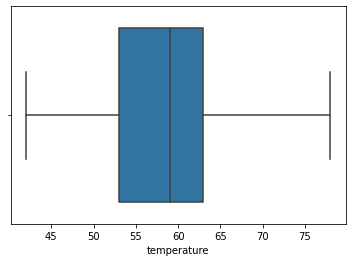

In [13]:
sns.boxplot(solar_data['temperature'])

Temperature doesn't seem to have significant outliers. All the other attributes have outliers. We need to remove them.

Scatter plot is another plot with which we can check for outliers.

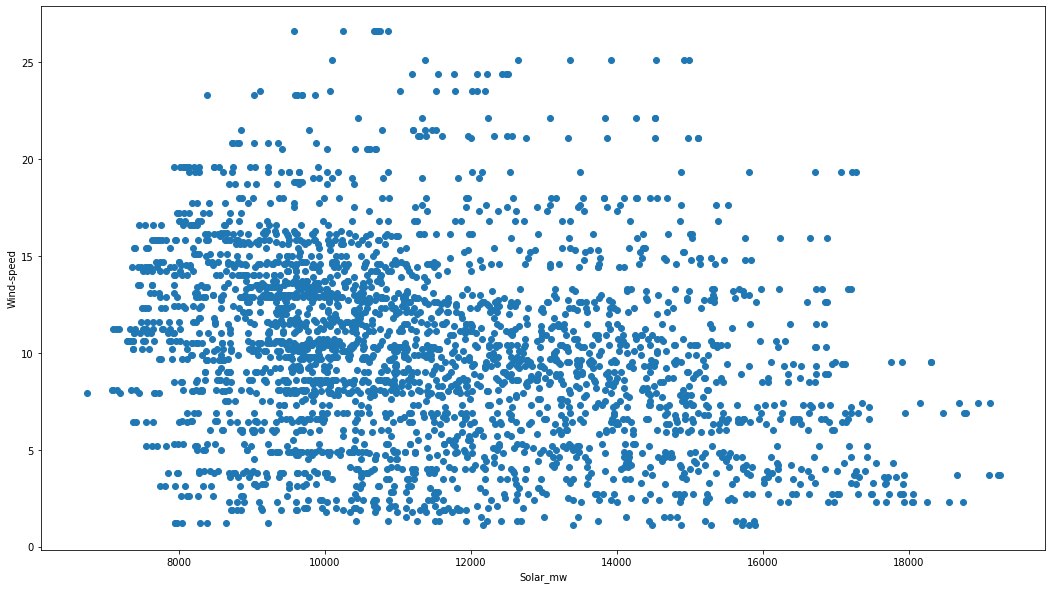

In [14]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(solar_data['solar_mw'], solar_data['wind-speed'])
 
# x-axis label
ax.set_xlabel('Solar_mw')
 
# y-axis label
ax.set_ylabel('Wind-speed')
plt.show()

 We have plotted the scatterplot for wind-speed*solar_mw and we find that the wind-speed has outliers above 22. Similarly, we can plot the scatterplots for other attributes as well to check for outliers.

The following code checks for outliers and removes them.

In [15]:
val1 = solar_data.select_dtypes(include = 'number')

Q1 = val1.quantile(0.25)
Q3 = val1.quantile(0.75)
IQR = Q3 - Q1

l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

val2 = val1.values
val3 = val1.index
k = val3[[np.where( (val1 > u) | (val1 < l) )]]

print(val3[[np.where( (val1 > u) | (val1 < l) )]])

[[   3    4    5    6   12   13   20   21   29   30   31   37   44  172
   308  320  321  322  323  324  325  327  330  331  332  333  335  336
   339  340  341  342  348  349  357  365  366  373  374  410  411  412
   413  414  421  422  429  437  597  603  605  726  727  728  729  730
   748  749  750  751  752  753  754  803  883  939 1049 1050 1051 1052
  1053 1054 1055 1056 1057 1058 1059 1060 1076 1077 1125 1186 1187 1187
  1188 1188 1189 1190 1191 1192 1193 1194 1195 1205 1228 1229 1343 1344
  1345 1346 1347 1348 1461 1646 1683 1684 1694 1704 1705 1706 1707 1708
  1708 1709 1709 1710 1711 1725 1733 1734 1739 1740 1741 1797 1800 1801
  1802 1803 1804 1804 1805 1805 1806 1806 1807 1853 1854 1861 1862 1863
  1880 1881 1882 1883 1883 1884 1884 1885 1886 1886 1887 1895 2013 2016
  2017 2018 2019 2020 2020 2021 2021 2022 2023 2045 2061 2068 2085 2328
  2329 2330 2331 2332 2332 2333 2333 2334 2334 2335 2336 2343 2344 2356
  2397 2524 2525 2532 2740 2765 2892 2893 2894 4719 4958 4959 49

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


In [16]:
solar_data.drop(k[0], axis =0, inplace = True)
solar_data1.drop(k[0], axis =0, inplace = True)
solar_data.shape

(4891, 8)

A null value in a relational database is used when the value in a column is unknown or missing. We have to check for null values as well.

In [17]:
solar_data.isnull().sum()

Datetime                          0
solar_mw                          0
wind-direction                 2839
wind-speed                     2147
humidity                       2147
average-wind-speed-(period)    2148
average-pressure-(period)      2147
temperature                    2147
dtype: int64

We find that there are null values present for almost all the attributes except solar_mw. There are many ways with which we can deal with null values. One obvious way is to remove all the records that have null values, but if we do that, we would be missing out on lot of information. And since, we had removed outliers also, we can use median of the attributes and fill all the null values using the median value.

In [18]:
solar_data['solar_mw']= solar_data['solar_mw'].fillna(solar_data['solar_mw'].median())
solar_data['wind-speed']= solar_data['wind-speed'].fillna(solar_data['wind-speed'].median())
solar_data['humidity']= solar_data['humidity'].fillna(solar_data['humidity'].median())
solar_data['average-wind-speed-(period)']= solar_data['average-wind-speed-(period)'].fillna(solar_data['average-wind-speed-(period)'].median())
solar_data['average-pressure-(period)']= solar_data['average-pressure-(period)'].fillna(solar_data['average-pressure-(period)'].median())
solar_data['temperature']= solar_data['temperature'].fillna(solar_data['temperature'].median())

In [19]:
solar_data1['solar_mw']= solar_data1['solar_mw'].fillna(solar_data1['solar_mw'].median())
solar_data1['wind-speed']= solar_data1['wind-speed'].fillna(solar_data1['wind-speed'].median())
solar_data1['humidity']= solar_data1['humidity'].fillna(solar_data1['humidity'].median())
solar_data1['average-wind-speed-(period)']= solar_data1['average-wind-speed-(period)'].fillna(solar_data1['average-wind-speed-(period)'].median())
solar_data1['average-pressure-(period)']= solar_data1['average-pressure-(period)'].fillna(solar_data1['average-pressure-(period)'].median())
solar_data1['temperature']= solar_data1['temperature'].fillna(solar_data1['temperature'].median())

In [20]:
solar_data.isnull().sum()

Datetime                          0
solar_mw                          0
wind-direction                 2839
wind-speed                        0
humidity                          0
average-wind-speed-(period)       0
average-pressure-(period)         0
temperature                       0
dtype: int64

In [21]:
solar_data['wind-direction'].unique()

array(['27', '28', '31', '30', '26', '24', '25', '29', '20', '23', '17',
       '18', '21', '32', '22', '10', '14', '19', '15', '16', '7', '13',
       '36', '4', '2', '6', '9', '12', '3', '11', '8', '1', '34', '5',
       '33', 'am', nan], dtype=object)

In [22]:
solar_data.loc[solar_data["wind-direction"] == "am", "wind-direction"] = solar_data.median()
solar_data1.loc[solar_data1["wind-direction"] == "am", "wind-direction"] = solar_data1.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [23]:
solar_data['wind-direction']= solar_data['wind-direction'].fillna(solar_data['wind-direction'].median())
solar_data1['wind-direction']= solar_data1['wind-direction'].fillna(solar_data1['wind-direction'].median())

Since there were invalid values for wind-direction (of string datatype), we fill those records also with the median value.

In [24]:
solar_data.isnull().sum()

Datetime                       0
solar_mw                       0
wind-direction                 0
wind-speed                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
temperature                    0
dtype: int64

Now, we find that there aren't any null values present in the dataset.

### Visualization

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(rc={"figure.figsize":(10, 10)})

In [26]:
solar_data.Datetime = pd.to_datetime(solar_data.Datetime)

In [27]:
solar_data.set_index('Datetime', inplace = True)

#setting the index as 'Datetime' to visualize the plots

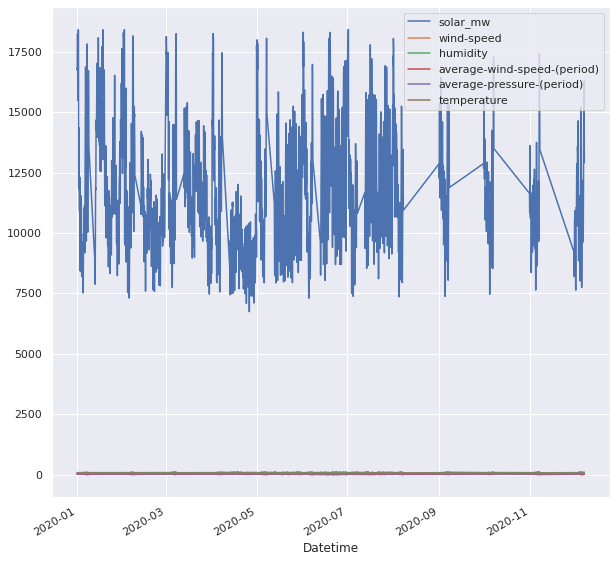

In [28]:
solar_data.plot()

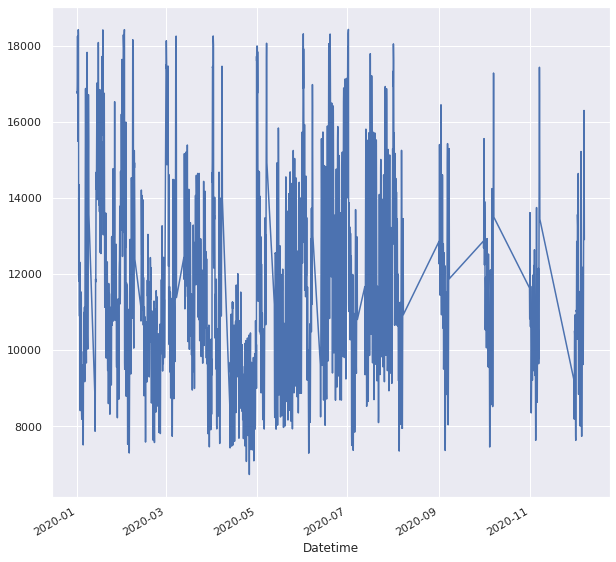

In [29]:
solar_data['solar_mw'].plot()

Inference: Over the months of the year 2020, there has been immediate sudden variations in the solar_mw, that is, the solar energy generated has been varying significantly over the months. More on how solar_mw changes can be seen from other plots.

Note: solar_mw is the dependent variable and all other attributes are independent variables.

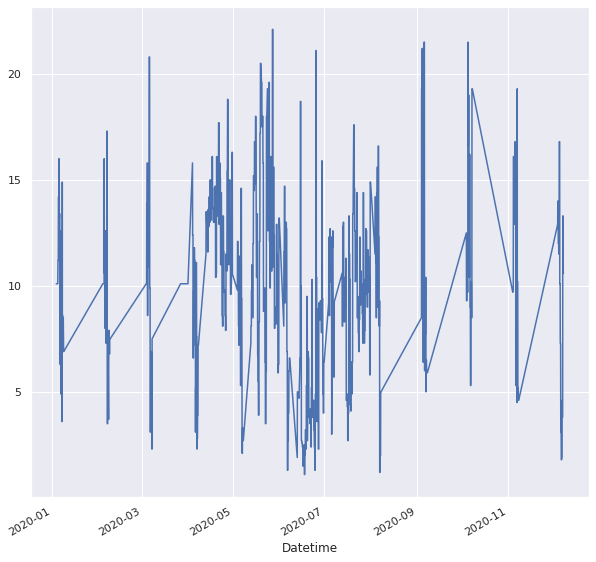

In [30]:
solar_data['wind-speed'].iloc[0:2922].plot()

Inference: Wind speed did not have much variations during the initial few months of the year and the final few months. Wind speed had much variation during the months of May to August.

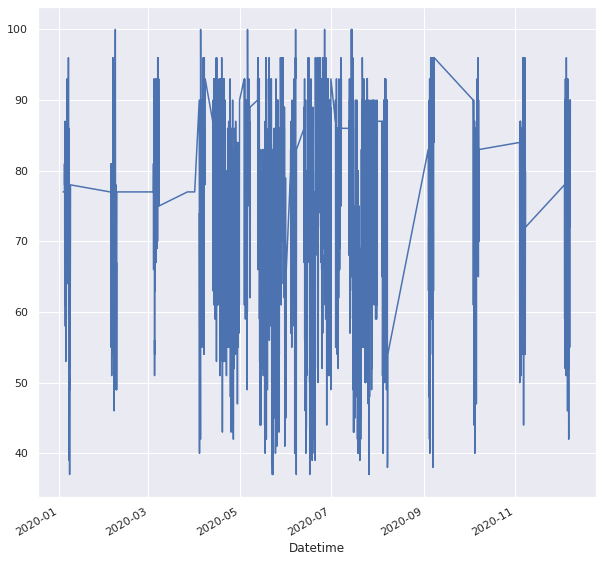

In [31]:
solar_data['humidity'].iloc[0:2922].plot()

Inference: Humidity 

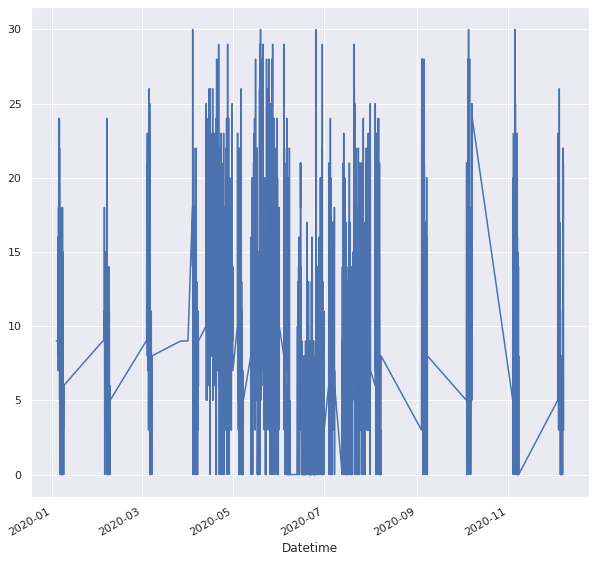

In [32]:
solar_data['average-wind-speed-(period)'].iloc[0:2922].plot()

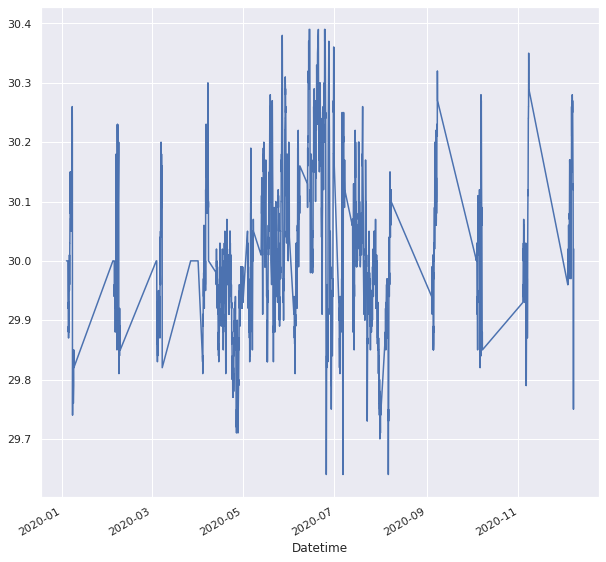

In [33]:
solar_data['average-pressure-(period)'].iloc[0:2922].plot()

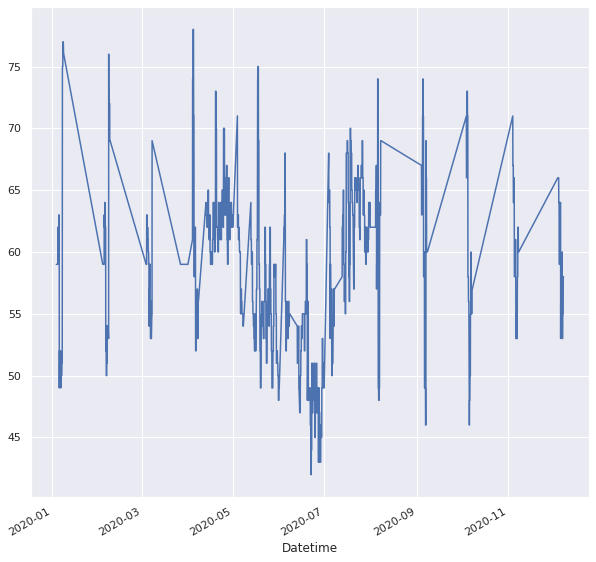

In [34]:
solar_data['temperature'].iloc[0:2922].plot()

#### Resampling

Resampling can also provide a different perception of looking at the data, in other words, it can add additional insights about the data based on the resampling frequency.

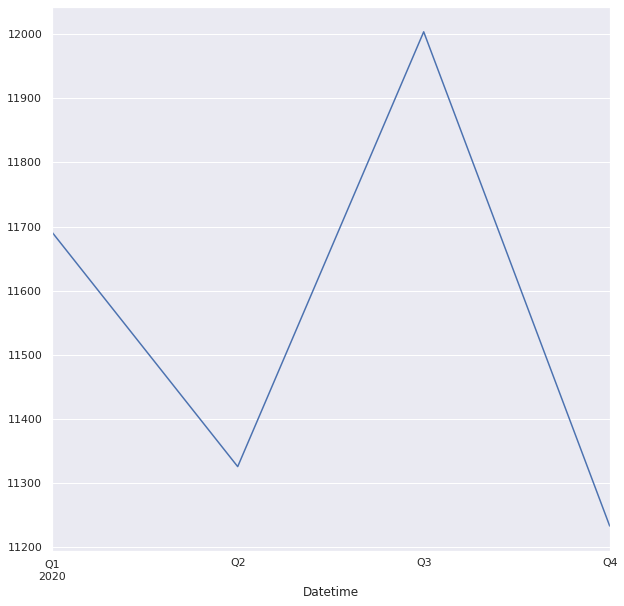

In [35]:
Quarterly_resampled_data = solar_data.solar_mw.resample('Q').mean()
Quarterly_resampled_data.plot()

Inference: 

We can observe that during the first quarter of 2020, there is a deprecation in the amount of solar_energy generated. But during the second quarter (April - June -> summer season), we can observe a rapid increase in the amount of solar energy generated. And then there is a swift reduction in the amount of solar energy.

In [36]:
solar_data1.dtypes

Datetime                        object
solar_mw                         int64
wind-direction                  object
wind-speed                     float64
humidity                       float64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
temperature                    float64
dtype: object

In [37]:
solar_data1['Datetime'] = pd.to_datetime(solar_data1['Datetime'])

In [38]:
solar_data1['month'] = solar_data1['Datetime'].dt.strftime('%b')

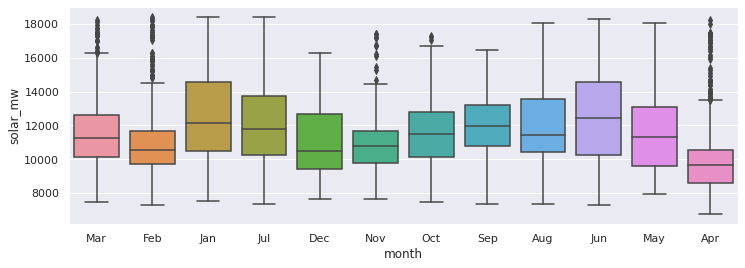

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='solar_mw',data=solar_data1,ax=ax)
plt.show()

Inference: From the box plot above, we can infer that during the months of January, May, June and July, solar energy generated is the maximum, which attributes to the summer season and the clear sky during these months which helped in generating more solar power.

But we can also infer that in the month of Feb and Apr, there are many times when the solar_mw generated is around 18000 which is not the case with other months. This also attributes to the summer season.

In [40]:
solar_data1['Date'] = pd.to_datetime(solar_data1['Datetime']).dt.date
solar_data1['Time'] = pd.to_datetime(solar_data1['Datetime']).dt.time

In [41]:
solar_data1.head()

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature,month,Date,Time
0,2020-03-08 00:00:00,11385,27,7.5,75.0,8.0,29.82,69.0,Mar,2020-03-08,00:00:00
1,2020-02-08 23:00:00,12390,27,7.5,77.0,5.0,29.85,69.0,Feb,2020-02-08,23:00:00
2,2020-02-08 22:00:00,13312,27,7.5,70.0,0.0,29.89,69.0,Feb,2020-02-08,22:00:00
7,2020-02-08 17:00:00,14924,27,7.5,49.0,6.0,29.86,69.0,Feb,2020-02-08,17:00:00
8,2020-02-08 16:00:00,14791,27,6.8,67.0,6.0,29.86,72.0,Feb,2020-02-08,16:00:00


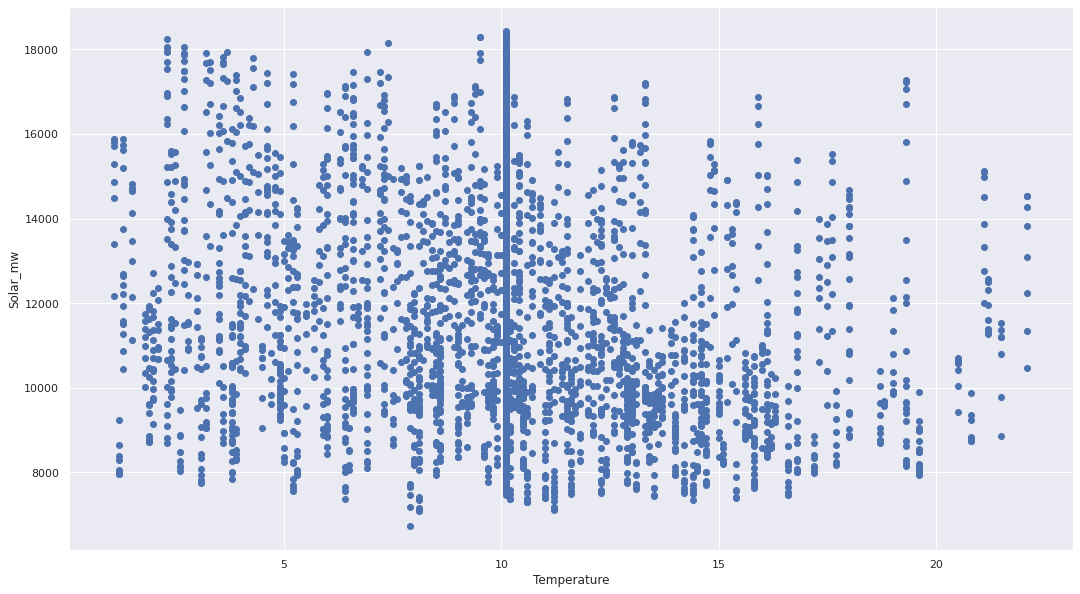

In [43]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(solar_data['wind-speed'],solar_data['solar_mw'])
 
# x-axis label
ax.set_xlabel('Temperature')
 
# y-axis label
ax.set_ylabel('Solar_mw')
plt.show()

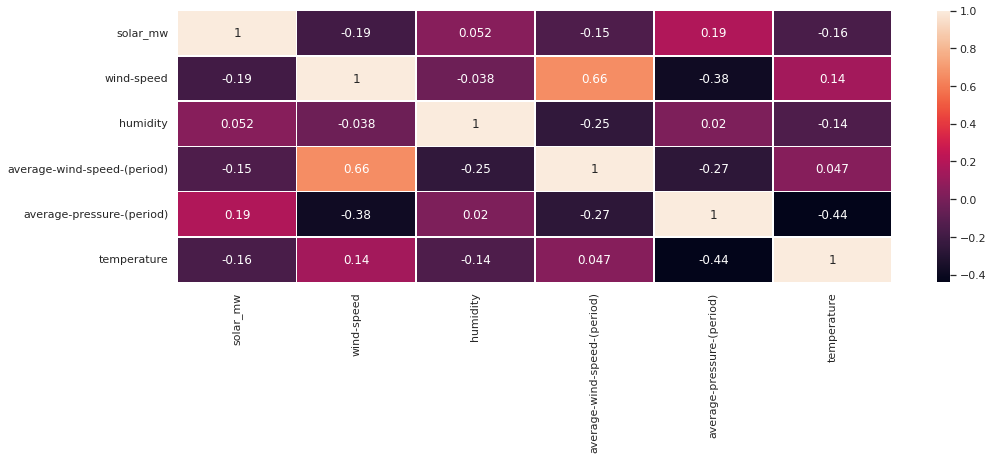

In [44]:
plt.figure(figsize = (16,5))
sns.heatmap(solar_data.corr(), annot=True, linewidths=.5);

Nothing can be inferred from the above correlation plot. Which means that a single attribute doesn't contribute much to the solar energy generated.

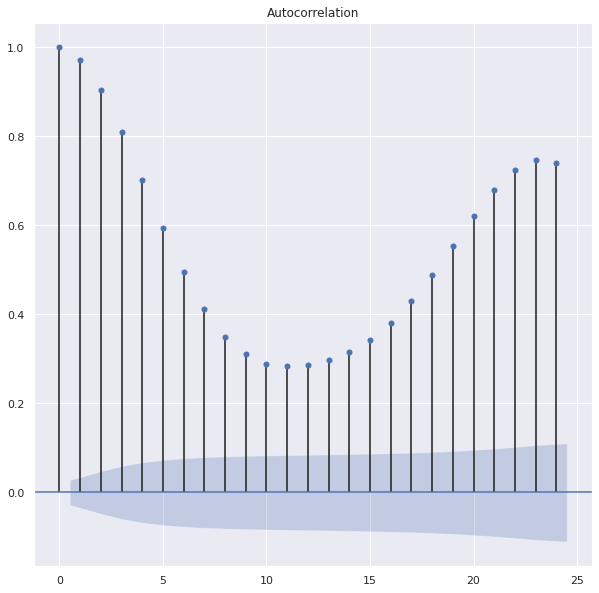

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_data['solar_mw'], lags=24)
plt.show()